# 22.02 Linear Support Vector Machines

As an introduction to Support Vector machines you'll start with the simplest example: linear support vector binary classifiers.  This modeling technique will provide decent performance as well as a solid gateway into more advanced SVM techniques.  You'll start by examining data from a course with test scores, project scores and whether the student passed or failed the course.

### Imports

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC

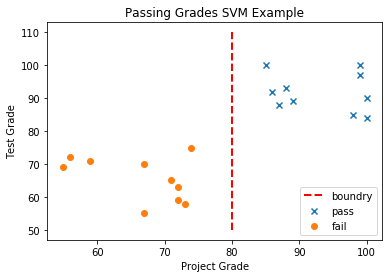

In [6]:
# Example data.
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Reusable function to plot data
def setup_plot():
    plt.scatter(test_data["project"][0:10], test_data["test"][0:10], marker="x")
    plt.scatter(test_data["project"][10:20], test_data["test"][10:20], marker="o")

    # Eyeball pass / fail line to split the points
    plt.plot([80, 80], [50,110], "r--", lw=2)

    plt.xlabel("Project Grade")
    plt.ylabel("Test Grade")

setup_plot()
plt.legend(["boundry", "pass", "fail"], loc=4)
plt.title("Passing Grades SVM Example")

plt.show();

In the plot above you eyeballed a straight-line decision **boundary** between the pass and the fail data points.  But is this the _best_ boundary line for making decisions?  Here are some other options.

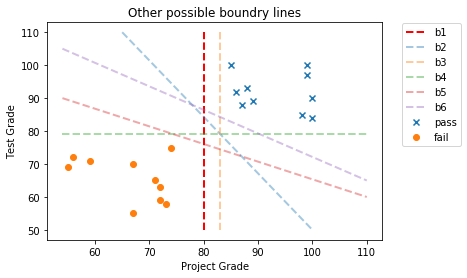

In [7]:
# Throw some other possible boundry lines into the mix 

# Rebuild the previous plot
setup_plot()

# Add some new boundry lines
plt.plot([65,100], [110,50], "--", lw=2, alpha=0.4)
plt.plot([83, 83], [110,50], "--", lw=2, alpha=0.4)
plt.plot([54,110], [79,79], "--", lw=2, alpha=0.4)
plt.plot([54,110], [90, 60], "--", lw=2, alpha=0.4)
plt.plot([54,110], [105,65], "--", lw=2, alpha=0.4)

plt.legend(["b1","b2","b3","b4","b5", "b6","pass","fail"], bbox_to_anchor=(0.25,0.02,1,1))
plt.title("Other possible boundry lines")
plt.show()

### Margin and Support Vectors

A boundary line passing close to datapoints is bad because it'll be susceptible to noise and be worse at predicting new data points than a boundary line farther away.  In SVM you define the **margin** as the distance between the nearest point of each class and the boundary.

Finding the margin for the initial red boundary line is easy.  The nearest point for each class is at (85,100) and (74,75).  These nearest points are the **support vectors** that the model is named after.  The distance from the support vectors to the red boundary line is just the horizontal distance (because the other boundary happens to be vertical).  The margin is 5 from the pass support vector and 6 from the fail support vector. 

That might not be the best you can do.  Several of the other boundary lines are worse, like the orange boundary line `b3`, but looking at the light blue boundary `b2` above you can see without having to do the math that the margin is larger so it's a _better_ boundary than the initial red boundary.  The goal of SVM is to find the _best_ boundary, or the boundary that optimizes the margin.

### Finding the Optimal Boundary 

You'll use SKLearn to find the optimal boundary line.  In the example, you'll force the boundary to be linear.  To do this you'll use SVC with a linear kernel.  


In [9]:
# Instantiate the model and fit the data
X = test_data[["test","project"]]
Y = test_data["pass"]
svm = SVC(kernel="linear") 
svm.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

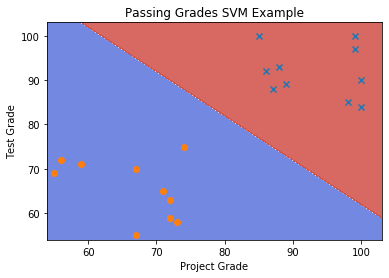

In [10]:
# Visualize the model 
y_min, y_max = X.test.min()-1, X.test.max()+3
x_min, x_max = X.project.min()-1, X.project.max()+3
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
    np.arange(y_min, y_max, 0.1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=="pass")

Z = Z.reshape(xx.shape)

# Plot the new boundries
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker="x")
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker="o")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Project Grade")
plt.ylabel("Test Grade")
plt.title("Passing Grades SVM Example")

plt.show();

The plot above looks pretty much as you'd expect.  You can see a nice clear division between the two classes with a maximum distance between the support vectors and the decision boundary.

### Things Get Messy

The above was a good example, but there are several things about it that are far simpler than anything you'd want to run in the wild.

The dataset is in two dimensions, but SVM works in as many dimensions as you'd like (given the limitations of your computing resources).  The boundary between two groups is therefore not always a line.  A line is simply the way to represent the boundary in two dimensions.  In general terms, the boundary is always a _hyperplane_.

A **hyperplane** in n-dimensional space is _an n-minus-one-dimensional space_.  So, for a 2-dimensional plane like this one, a hyperplane is a 1-dimensional line.  In a 3-dimensional space the hyperplane is a 2-dimensional plane In a 4-dimensional space a hyperplane is a 3-dimensional plane.  It can get tricky to visualize from a 3-dimensional point on, but the concept continues in any number of dimensions.

Also, of note is that this dataset has a boundary that groups each observation exclusively on one side of the line.  This is called a _hard margin_.  It won't always be possible to make a boundary with a hard margin.  When it's not, the problem is called _soft margin_ (these two terms apply to all classifiers).

To deal with this kind of problem, SVM imposes a cost function.  The cost function gives SVM two things to balance: the size of the margin (which it wants to maximize) and the cumulative distance of the points on the wrong side of the margin from the boundary (which it wants to minimize).

How SVM balances these factors is complex and understanding the vector math behind it is not essential.  What _is_ important to know is that you can control the priorities of this tradeoff by controlling that weight.  How you want to tune it depends on your tolerance for inaccurate results as compared to large margins.
